In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def bin_count_stats(df):
    print("min count\t" + str(np.min(df["count"])) + "\tbin\t" + str(df[df["count"] == np.min(df["count"])]["bin"].values[0]))
    print("max count\t" + str(np.max(df["count"])) + "\tbin\t" + str(df[df["count"] == np.max(df["count"])]["bin"].values[0]))
    print("mean count\t" + str(np.mean(df["count"])))
    print("stdev\t" + str(np.std(df["count"])))

In [3]:
def plot_bin_counts(filename):
    df = pd.read_csv(filename, header = None, names = ["shape", "kmer-size", "count", "seg-len"], sep = "\t")
    df["bin"] = np.arange(len(df["count"]))
    plt.figure(figsize=(8, 5))
    plt.bar(df["bin"], df["count"])
    plt.xlabel("Genome segment")
    plt.ylabel("Distinct minimiser count")
    plt.title("Distinct minimiser count across " + filename)
    bin_count_stats(df)

def plot_bin_entropy(filename):
    df = pd.read_csv(filename, header = None, names = ["shape", "kmer-size", "count", "seg-len"], sep = "\t")
    df["bin"] = np.arange(len(df["count"]))
    plt.figure(figsize=(8, 5))
    plt.bar(df["bin"], df["count"]/df["seg-len"])
    plt.xlabel("Genome segment")
    plt.ylabel("Normalized distinct minimiser")
    plt.title("Sequence entropy across " + filename)
    bin_count_stats(df)

In [7]:
filename = "mouse.header"
df = pd.read_csv(filename, header = None, names = ["shape", "kmer-size", "count", "seg-len"], sep = "\t")
df["bin"] = np.arange(len(df["count"]))
bin_count_stats(df)

min count	6	bin	70
max count	301364	bin	2
mean count	42678.9189453125
stdev	45155.90290647607


In [11]:
np.max(df["count"]) / (np.mean(df["count"]) * 1.1)

6.419264580678021

In [12]:
(7.5 * 1024) / 491

15.641547861507128

## Are segments of equal length?

No

In [4]:
filename = "human.header"
df = pd.read_csv(filename, header = None, names = ["shape", "kmer-size", "count", "seg-len"], sep = "\t")
np.std(df["seg-len"])

526158.6558032142

Is normalization necessary?

In [5]:
df["entropy"] = df["count"] / df["seg-len"]
round(df["count"].corr(df["entropy"]), 3)

0.889

Yes, to describe 11% of the variation

## Plot entropy across the genome

The number of distinct minimisers is a proxy for the entropy

min count	7	bin	664
max count	409641	bin	708
mean count	41383.205078125
stdev	39551.69793236369


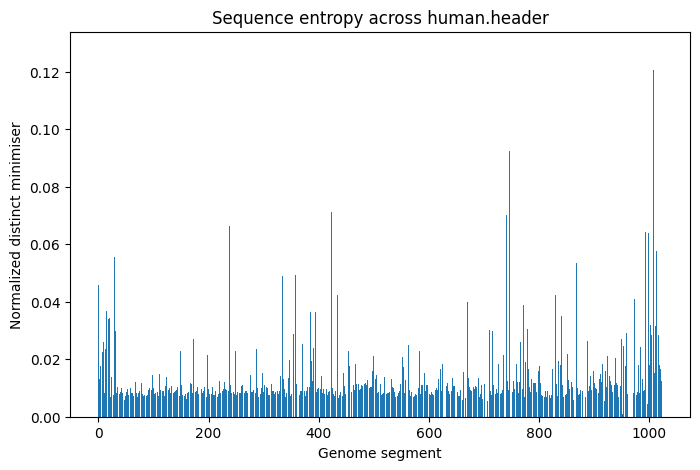

In [102]:
plot_bin_entropy("human.header")

min count	6	bin	70
max count	301364	bin	2
mean count	42678.9189453125
stdev	45155.90290647607


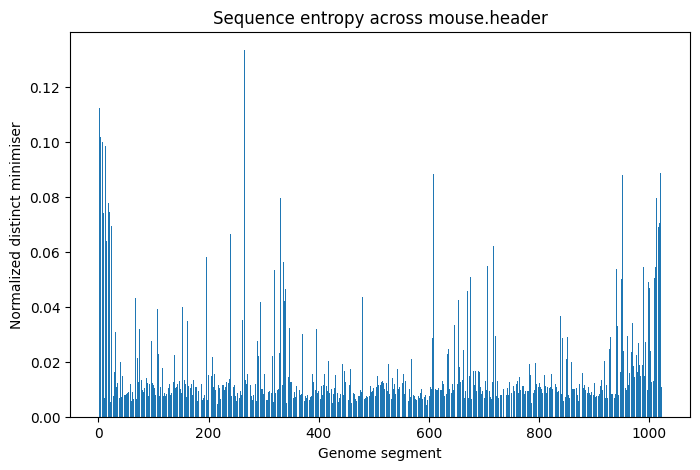

In [103]:
plot_bin_entropy("mouse.header")

min count	3504	bin	38
max count	186966	bin	1
mean count	43702.84375
stdev	57842.58461797922


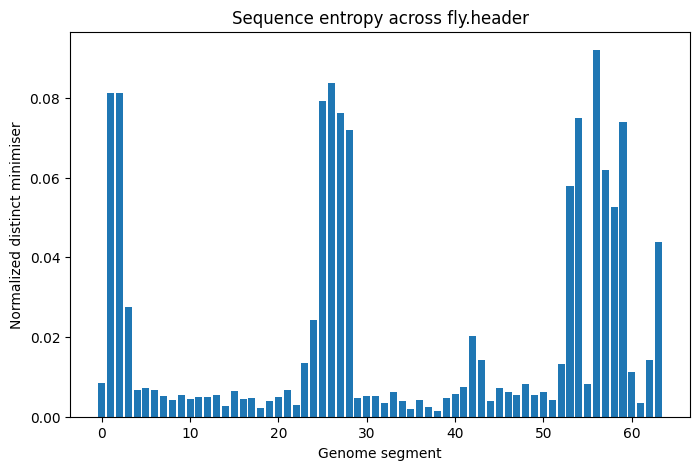

In [104]:
plot_bin_entropy("fly.header")